In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def get_color(i, colormap='rainbow', n_tot=7):
    cmap = plt.get_cmap(colormap)
    return cmap(i/n_tot)

In [8]:
datapath = '/data/STARDICE/cbp/solarcell/ut20210713/LinearityScans'

### Sasha's script

#### Command to create the files

In [6]:
#%run home/tsouverin/stardice/analysis/solar_cell/scripts/AnalyzeFrenchWavelengthScans_qsw_linearity.py

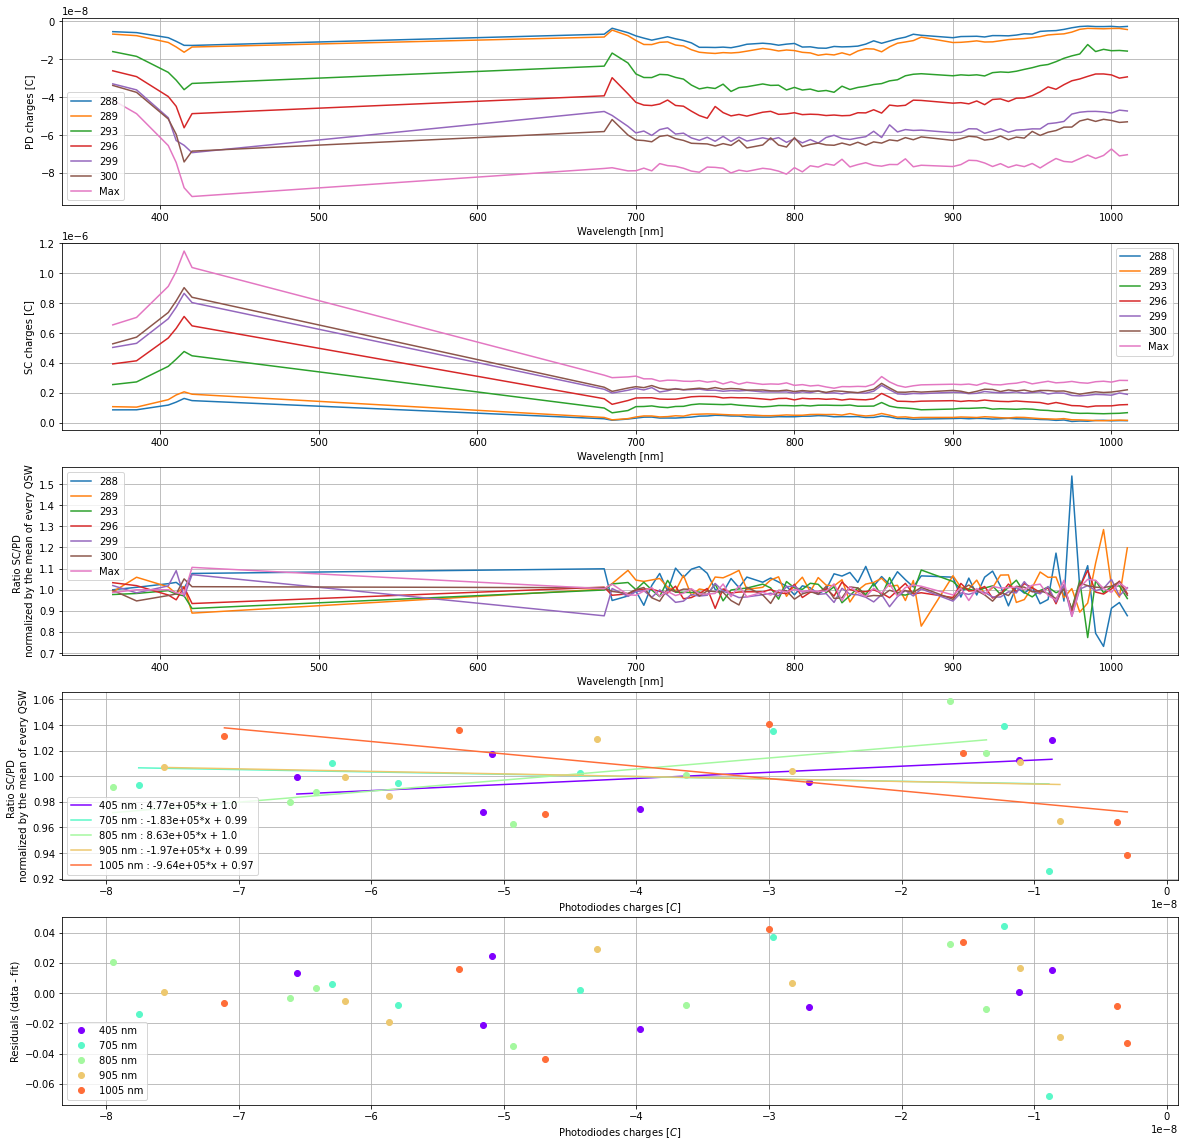

In [13]:
l_qsw = ['288', '289', '293', '296', '299', '300', 'Max']

fig, ax = plt.subplots(5,1,figsize = (20,20))

wl_max = np.arange(350,1050,5)

l_PD_Sasha = []
l_SC_Sasha = []
l_R_Sasha = []
l_PD_Sasha_wl = []
l_SC_Sasha_wl = []

#Load the files

for qsw in l_qsw :

    PD_wl, PD_charges = np.loadtxt(datapath + f"/QSW{qsw}/QSW{qsw}_5mm_LinTestPD_charges.csv", skiprows=1, delimiter=",").T
    SC_wl, SC_charges = np.loadtxt(datapath + f"/QSW{qsw}/QSW{qsw}_5mm_LinTestSC_charges.csv", skiprows=1, delimiter=",").T
    ratio_wl, ratio_SC_PD = np.loadtxt(datapath + f"/QSW{qsw}/QSW{qsw}_5mm_LinTestSC_photons_over_PD_electrons.txt", skiprows=1, delimiter=",").T
    
    l_PD_Sasha.append(-PD_charges*5*1.6e-13)
    l_SC_Sasha.append(SC_charges*5*1.6e-13)
    l_PD_Sasha_wl.append(PD_wl)
    l_SC_Sasha_wl.append(SC_wl)
   
    #Plot PD and SC charges
#     ax[0].plot(PD_wl, PD_charges, label = f'{qsw}')
#     ax[1].plot(SC_wl, SC_charges, label = f'{qsw}')
    
#Define the intersection range of wavelength    
A = l_PD_Sasha_wl[0]
B = l_SC_Sasha_wl[0]

for i, pdwl in enumerate(l_PD_Sasha_wl) :
    A = np.intersect1d(A, pdwl)
    
for i, scwl in enumerate(l_SC_Sasha_wl) :
    B = np.intersect1d(B, scwl)
    
wl_inter = np.intersect1d(A, B)

#Keeping the data of the intersection range    
for num in range(len(l_PD_Sasha)) :
    l_PD_Sasha[num] = l_PD_Sasha[num][np.in1d(l_PD_Sasha_wl[num], wl_inter)]
    l_SC_Sasha[num] = l_SC_Sasha[num][np.in1d(l_SC_Sasha_wl[num], wl_inter)]
    l_R_Sasha.append(l_PD_Sasha[num]/l_SC_Sasha[num])

l_R_Sasha = np.array(l_R_Sasha)
l_PD_Sasha = np.array(l_PD_Sasha)
l_SC_Sasha = np.array(l_SC_Sasha)
R_mean_Sasha = np.mean(l_R_Sasha, axis = 0)
R_max = l_R_Sasha[-1]

#Plot the ratio normalized by the mean ratio
for i, qsw in enumerate(l_qsw) :
    ax[0].plot(wl_inter, l_PD_Sasha[i], label = f'{qsw}')
    ax[1].plot(wl_inter, l_SC_Sasha[i], label = f'{qsw}')
    ax[2].plot(wl_inter, l_R_Sasha[i]/R_mean_Sasha, label = f'{qsw}')
    
#Plot the ratio depending on the PD charges and try to fit them    
l_color = ['b', 'r', 'g', 'c', 'm', 'y', 'k'] 
step = int(np.ceil(wl_inter.size/len(l_color)))
l_wl = wl_inter[::step]
l_wl = np.arange(405, 1055, 100)

for n, wl in enumerate(l_wl) :
    
    x = []
    y = []
    
    for i, qsw in enumerate(l_qsw) :
        y.append(l_R_Sasha[i][wl_inter == wl]/R_mean_Sasha[wl_inter == wl])
        x.append(l_PD_Sasha[i][wl_inter == wl])

    x, y = np.array(x).squeeze(), np.array(y).squeeze()
    ax[3].plot(x, y, linestyle = 'none', marker = 'o', color = get_color(n))
            
    if x.size > 0 :
        a, b = np.polyfit(x, y, 1)
        fit = a*x + b

        ax[3].plot(x, fit, label = f'{wl} nm : {a:.2e}*x + {b:.2}', color = get_color(n))
        ax[4].plot(x, y-fit, label = f'{wl} nm', linestyle = 'none', marker = 'o', color = get_color(n))

        
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('PD charges [C]')
ax[0].grid()
ax[0].legend()

ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('SC charges [C]')
ax[1].grid()
ax[1].legend()

ax[2].set_xlabel('Wavelength [nm]')
ax[2].set_ylabel('Ratio SC/PD \n normalized by the mean of every QSW')
ax[2].grid()
#ax[2].set_ylim(0.8,1.3)
ax[2].legend()

ax[3].set_xlabel('Photodiodes charges $[C]$')
ax[3].set_ylabel('Ratio SC/PD \n normalized by the mean of every QSW')
ax[3].grid()
#ax[3].set_ylim(0,25)
ax[3].legend()

ax[4].set_xlabel('Photodiodes charges $[C]$')
ax[4].set_ylabel('Residuals (data - fit)')
ax[4].grid()
#ax[4].set_ylim(0,4)
ax[4].legend()


plt.show()


#### The code below allow interpolation between the missing points but this implies a lot of bias and noise

In [356]:
# l_qsw = ['288', '289', '293', '296', '299', '300', 'Max']

# fig, ax = plt.subplots(5,1,figsize = (20,20))

# wl_max = np.arange(350,1050,5)

# l_PD = []
# l_SC = []
# l_R = []
# l_PD_wl = []
# l_SC_wl = []

# #Load the files

# for i, qsw in enumerate(l_qsw) :

#     PD_wl, PD_charges = np.loadtxt(datapath + f"/QSW{qsw}/QSW{qsw}_5mm_LinTestPD_charges.csv", skiprows=1, delimiter=",").T
#     SC_wl, SC_charges = np.loadtxt(datapath + f"/QSW{qsw}/QSW{qsw}_5mm_LinTestSC_charges.csv", skiprows=1, delimiter=",").T
#     ratio_wl, ratio_SC_PD = np.loadtxt(datapath + f"/QSW{qsw}/QSW{qsw}_5mm_LinTestSC_photons_over_PD_electrons.txt", skiprows=1, delimiter=",").T
#     l_PD_wl.append(PD_wl)
#     l_SC_wl.append(SC_wl)
#     print(PD_charges.shape, SC_charges.shape)
    
#     #Handle the case of 'inf' value in the ratio
#     if np.isfinite(ratio_SC_PD).any() :
#         for n, r in enumerate(ratio_SC_PD) : 
#             if not np.isfinite(r) :
#                 ratio_SC_PD[n] = np.mean((ratio_SC_PD[n-1], ratio_SC_PD[n+1]))
    
#     l_PD.append(np.interp(wl_max, PD_wl, PD_charges))
#     l_SC.append(np.interp(wl_max, SC_wl, SC_charges))
    
#     #Use Sasha's calculaion of ratio divided by QEs
#     #l_R.append(np.interp(wl_max, ratio_wl, ratio_SC_PD))
        
#     #Use direct calculation of ratio
#     l_R.append(l_SC[i]/l_PD[i])
    
#     #Plot PD and SC charges
#     ax[0].plot(PD_wl, PD_charges, label = f'{qsw}')
#     ax[1].plot(SC_wl, SC_charges*5*1.6e-13, label = f'{qsw}')
    
# l_R = np.array(l_R)
# R_mean = np.mean(l_R, axis = 0)

# R_max = l_R[-1]

# #Plot the ratio normalized by the mean ratio
# for i, qsw in enumerate(l_qsw) :
#     ax[2].plot(wl_max, l_R[i]/R_mean, label = f'{qsw}')
    
# #Plot the ratio depending on the PD charges and try to fit them    
# l_color = ['b', 'r', 'g', 'c', 'm', 'y', 'k'] 

# for n, wl in enumerate(np.arange(wl_max[0]+50, wl_max[-1], 100)) :
    
#     x = []
#     y = []
    
#     for i, qsw in enumerate(l_qsw) :
#         if int(wl)%100 == 0 :
#             y.append(l_R[i][n]/R_mean[n])
#             x.append(l_PD[i][n])
            
#     x, y = np.array(x), np.array(y)
            
#     a, b = np.polyfit(x, y, 1)
#     fit = a*x + b
    
#     ax[3].plot(x, y, linestyle = 'none', marker = 'o', color = l_color[n])
#     ax[3].plot(x, fit, label = f'{wl} nm : {a:.2e}*x + {b:.2}', color = l_color[n])
#     ax[4].plot(x, y-fit, label = f'{wl} nm', linestyle = 'none', marker = 'o', color = l_color[n])

        
# ax[0].set_xlabel('Wavelength [nm]')
# ax[0].set_ylabel('PD charges  $[10^{6} \, e^{-}]$')
# ax[0].grid()
# ax[0].legend()

# ax[1].set_xlabel('Wavelength [nm]')
# ax[1].set_ylabel('SC charges [C]')
# ax[1].grid()
# ax[1].legend()

# ax[2].set_xlabel('Wavelength [nm]')
# ax[2].set_ylabel('Ratio SC/PD \n normalized at QSW = MAX')
# ax[2].grid()
# #ax[2].set_ylim(0.8,1.3)
# ax[2].legend()

# ax[3].set_xlabel('Photodiodes charges $[10^{6} \, e^{-}]$')
# ax[3].set_ylabel('Ratio SC/PD \n normalized at QSW = MAX')
# ax[3].grid()
# #ax[3].set_ylim(0,25)
# ax[3].legend()

# ax[4].set_xlabel('Photodiodes charges $[10^{6} \, e^{-}]$')
# ax[4].set_ylabel('Residuals (ratio SC/PD - fit)')
# ax[4].grid()
# #ax[4].set_ylim(0,4)
# ax[4].legend()


# plt.show()


### Conclusion

#### For certain types of points, the script can't do a proper fit and remove the wavelength correpsonding to this data point. Thus the range of wanvelength is different for each QSW, so we can only evaluate the linearity in the intersection of these intervals. Which give us obviously not enough points since we lose more than the half of the data.

### Jérémy's script

#### Command to creates the files

In [446]:
# l_qsw = ['288', '289', '293', '296', '299', '300', 'Max']

# for qsw in l_qsw:

#     print(f'/data/STARDICE/cbp/solarcell/ut20210713/LinearityScans/QSW{qsw}/')
#     %run home/tsouverin/stardice/analysis/cbp_paper/solarcell_analysis.py /data/STARDICE/cbp/solarcell/ut20210713/LinearityScans/QSW{qsw}/ -t _LinTest -o /data/STARDICE/cbp/solarcell/ut20210713/LinearityScans/jeremy_script_27_07_2021/QSW{qsw}.npy --nbursts 5

#### Load data, and rearrange the wavelengths in the increasing order from [1000 --> 1050 --> 350 --> 999] to [350 --> 1050]
#### Get rid of the QSW = 296 that has two bad sets of wavelengths and got a loop to separate two set of data for the same QSW

In [10]:
l_data = []
l_qsw = ['288', '289', '293', '299', '300', 'Max']
l_wl = np.arange(350,1050,5)

for qsw in l_qsw: 
    data = np.load(f'/data/STARDICE/cbp/solarcell/ut20210713/LinearityScans/jeremy_script_27_07_2021/QSW{qsw}.npy')
    
    if len(data) == 140 :
        data = np.concatenate((data[10:-1], data[0:10]), axis = 0)
        l_data.append(data)
        
#Made to take in account strange data at qsw = 296 that have two bad set of wavelengths
#Not used for now
        
    elif len(data) == 280 :
        data_corr = []
        
        for wl in l_wl :
            data_corr.append(data[np.where(data['set_wl'] == wl)[0][1]])
            
        data_corr = np.concatenate((data_corr[10:-1], data_corr[0:10]), axis = 0)
        l_data.append(data_corr)


All data: -1.2e+06*x_tot + 0.91


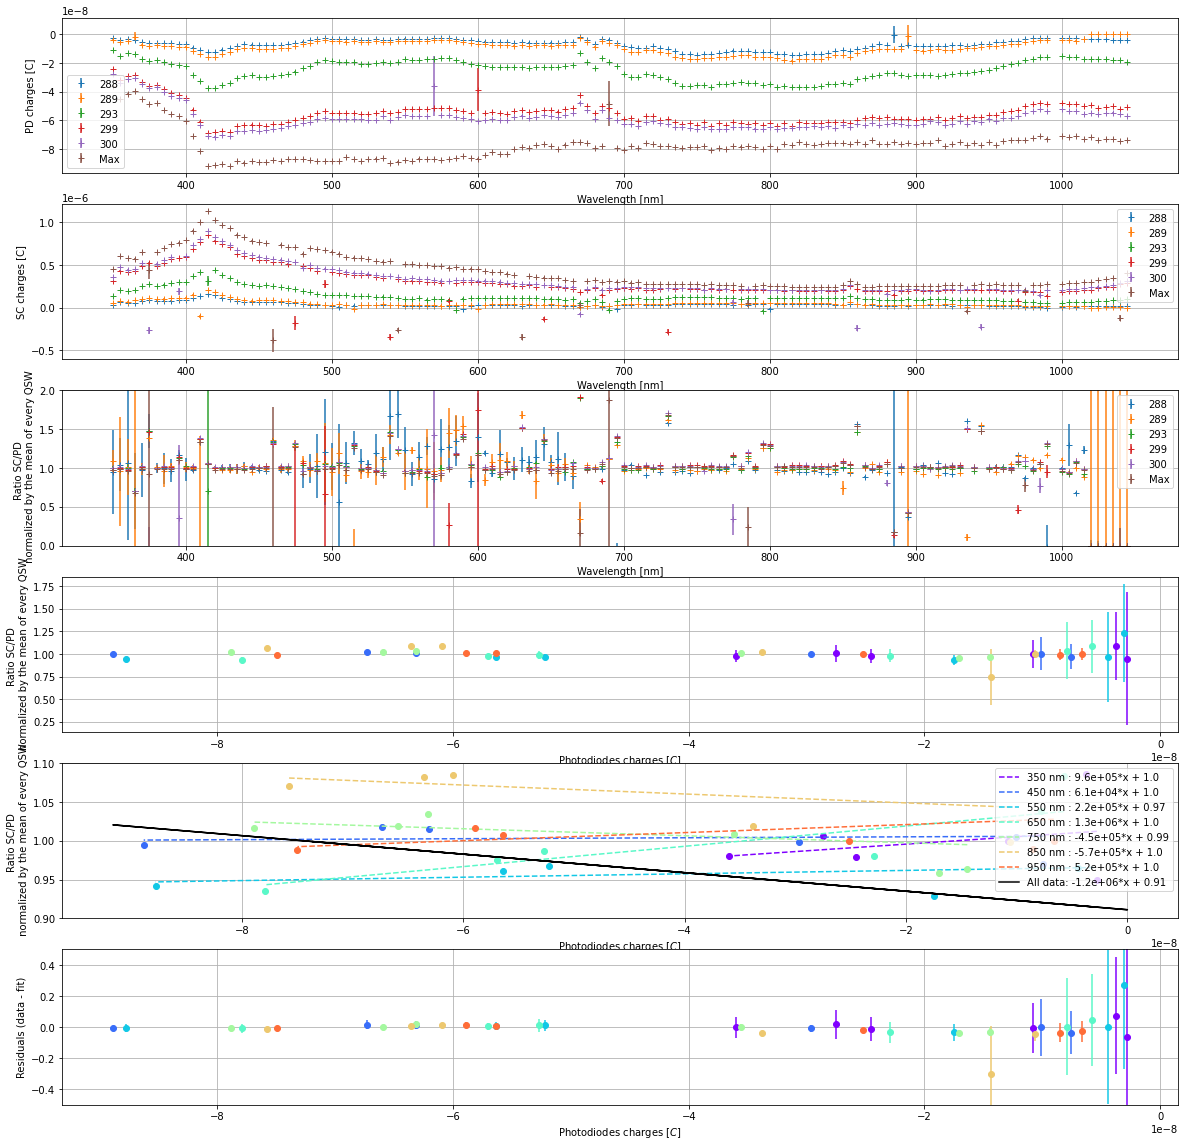

In [47]:
l_qsw = ['288', '289', '293', '299', '300', 'Max']

fig, ax = plt.subplots(6,1,figsize = (20,20))

l_wl = l_data[0]['set_wl']

R_max = l_data[-1]['sc_charge_total']/l_data[-1]['pd_charge_total']
l_R_Jeremy = []
l_PD_Jeremy = []
l_SC_Jeremy = []
l_PD_err_Jeremy = []
l_SC_err_Jeremy = []
l_R_err_Jeremy = []

#Create the PD, PC and the ratio R = SC/PD charges
for i, qsw in enumerate(l_qsw) :

    PD_charges = l_data[i]['pd_charge_total']
    SC_charges = l_data[i]['sc_charge_total']
    PD_err = l_data[i]['pd_charge_total_err']
    SC_err = l_data[i]['sc_charge_total_err']
    
    l_PD_Jeremy.append(PD_charges)
    l_SC_Jeremy.append(SC_charges)
    l_R_Jeremy.append(SC_charges/PD_charges)
    
    l_PD_err_Jeremy.append(PD_err)
    l_SC_err_Jeremy.append(SC_err)
    l_R_err_Jeremy.append(SC_charges/PD_charges * np.sqrt((SC_err/SC_charges)**2 + (PD_err/PD_charges)**2))
    
#Calculate the mean ratio to normalize the ratio R  
l_R_Jeremy = np.array(l_R_Jeremy)
R_mean_Jeremy = np.mean(l_R_Jeremy, axis = 0)
R_mean_Jeremy = np.where(np.isfinite(R_mean_Jeremy), R_mean_Jeremy, 1)

#Plot the charges for PD, SC and R depending on wavelength
for i, qsw in  enumerate(l_qsw) : 
    
    ax[0].errorbar(l_wl, l_PD_Jeremy[i], l_PD_err_Jeremy[i], marker = '+', linestyle = 'none', label = f'{qsw}')
    ax[1].errorbar(l_wl, l_SC_Jeremy[i], l_SC_err_Jeremy[i], marker = '+', linestyle = 'none', label = f'{qsw}')
    ax[2].errorbar(l_wl, l_R_Jeremy[i]/R_mean_Jeremy, l_R_err_Jeremy[i]**2, marker = '+', linestyle = 'none', label = f'{qsw}')
    
#Plot the charges for R normalized by the mean depending on the PD charges
#Try to fit and plot the residuals
l_color = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
l_wl_step = np.arange(350, 1050, 100)



for n, wl in enumerate(l_wl_step) :
    
    x = []
    y = []
    sig = []
    
    for i, qsw in enumerate(l_qsw) :
        y.append(l_R_Jeremy[i][l_wl == wl]/R_mean_Jeremy[l_wl == wl])
        x.append(l_PD_Jeremy[i][l_wl == wl])
        sig.append(l_R_err_Jeremy[i][l_wl == wl])

    x, y, sig = np.array(x).squeeze(), np.array(y).squeeze(), np.array(sig).squeeze()
    a, b = np.polyfit(x, y, 1, w = 1/sig)
    fit = a*x +b
    ax[3].errorbar(x, y, sig, linestyle = 'none', marker = 'o', color = get_color(n, n_tot = l_wl_step.size), label = f'{wl} nm')
    ax[4].plot(x, y, linestyle = 'none', marker = 'o', color = get_color(n, n_tot = l_wl_step.size))
    ax[4].plot(x, fit, linestyle = 'dashed', label = f'{int(wl)} nm : {a:.1e}*x + {b:.2}', color = get_color(n, n_tot = l_wl_step.size))
    ax[5].errorbar(x, y-fit, sig, label = f'{int(wl)} nm', linestyle = 'none', marker = 'o', color = get_color(n, n_tot = l_wl_step.size))
    
    
# Mega fit with all the data

x_tot = []
y_tot = []
sig_tot = []

for wl in l_wl :
    for i, qsw in enumerate(l_qsw) :
        y_tot.append(l_R_Jeremy[i][l_wl == wl]/R_mean_Jeremy[l_wl == wl])
        x_tot.append(l_PD_Jeremy[i][l_wl == wl])
        sig_tot.append(l_R_err_Jeremy[i][l_wl == wl])

x_tot, y_tot, sig_tot = np.array(x_tot).squeeze(), np.array(y_tot).squeeze(), np.array(sig_tot).squeeze()
a_tot, b_tot = np.polyfit(x_tot, y_tot, 1, w = 1/sig_tot)
mega_fit = a_tot*x_tot + b_tot
ax[4].plot(x_tot, mega_fit, label = f'All data: {a_tot:.1e}*x + {b_tot:.2}', color = 'k')
print(f'All data: {a_tot:.1e}*x_tot + {b_tot:.2}')


ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('PD charges [C]')
ax[0].grid()
ax[0].legend()

ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('SC charges [C]')
ax[1].grid()
ax[1].legend()

ax[2].set_xlabel('Wavelength [nm]')
ax[2].set_ylabel('Ratio SC/PD \n normalized by the mean of every QSW')
ax[2].grid()
ax[2].set_ylim(0,2)
ax[2].legend()

ax[3].set_xlabel('Photodiodes charges $[C]$')
ax[3].set_ylabel('Ratio SC/PD \n normalized by the mean of every QSW')
ax[3].grid()
#ax[3].set_ylim(0.9,1.1)
#ax[3].legend()

ax[4].set_xlabel('Photodiodes charges $[C]$')
ax[4].set_ylabel('Ratio SC/PD \n normalized by the mean of every QSW')
ax[4].grid()
ax[4].set_ylim(0.9,1.1)
ax[4].legend()

ax[5].set_xlabel('Photodiodes charges $[C]$')
ax[5].set_ylabel('Residuals (data - fit)')
ax[5].grid()
ax[5].set_ylim(-0.5,0.5)
#ax[5].legend()



plt.show()

###  Comparison of the two scripts

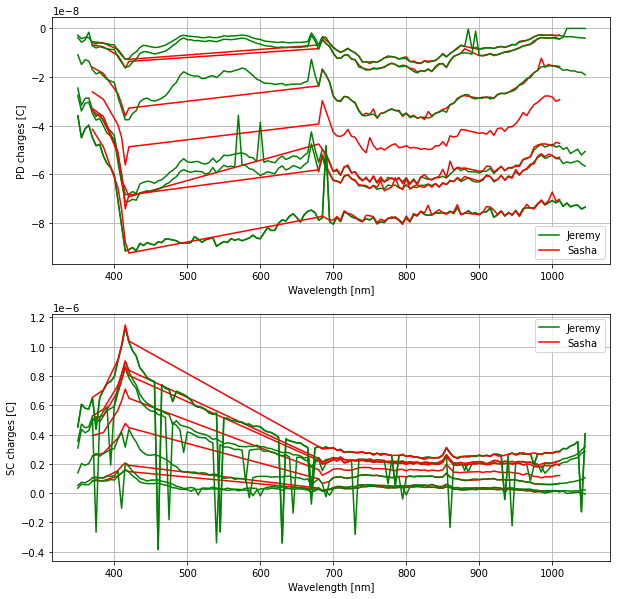

In [433]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

for i, qsw in  enumerate(l_qsw) : 
    
    ax[0].plot(wl_inter, -l_PD_Sasha[i]*5*1.6e-13, color = 'r')
    ax[1].plot(wl_inter, l_SC_Sasha[i]*5*1.6e-13, color = 'r')
    
    ax[0].plot(l_wl, l_PD_Jeremy[i], color = 'g')
    ax[1].plot(l_wl, l_SC_Jeremy[i], color = 'g')   
    
ax[0].plot(l_wl, l_PD_Jeremy[i], label = f'Jeremy', color = 'g')
ax[1].plot(l_wl, l_SC_Jeremy[i], label = f'Jeremy', color = 'g')   
    
ax[0].plot(wl_inter, -l_PD_Sasha[i+1]*5*1.6e-13, label = f'Sasha', color = 'r')
ax[1].plot(wl_inter, l_SC_Sasha[i+1]*5*1.6e-13, label = f'Sasha', color = 'r')

ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('PD charges [C]')
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('SC charges [C]')
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

plt.show()